In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("homicide_by_countries.csv")

In [3]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [4]:
df.shape

(195, 6)

check if there are any null values

In [5]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [6]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [7]:
df["rate"] = df["Rate"].astype(int)

In [8]:
df["rate"].dtype

dtype('int32')

In [9]:
df

,Location,Region,Subregion,Rate,Count,Year,rate
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,6
1,Albania,Europe,Southern Europe,2.1,61,2020,2
2,Algeria,Africa,Northern Africa,1.3,580,2020,1
3,Andorra,Europe,Southern Europe,2.6,2,2020,2
4,Angola,Africa,Middle Africa,4.8,1217,2012,4
...,...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018,36
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011,1
192,Yemen,Asia,Western Asia,6.8,1703,2013,6
193,Zambia,Africa,Eastern Africa,5.4,853,2015,5


In [10]:
df["Region"].replace("Americas", "N/S America", inplace=True)

C:\Users\Fateme\AppData\Local\Temp\ipykernel_14744\464157520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Region"].replace("Americas", "N/S America", inplace=True)


In [11]:
df1 = df.sort_values("Count", ascending= False).reset_index(drop = True)

In [12]:
df1

,Location,Region,Subregion,Rate,Count,Year,rate
0,Brazil,N/S America,South America,22.5,47722,2020,22
1,Nigeria,Africa,Western Africa,22.0,44200,2019,22
2,India,Asia,Southern Asia,3.0,40651,2020,3
3,Mexico,N/S America,Central America,28.4,36579,2020,28
4,United States,N/S America,Northern America,6.5,21570,2020,6
...,...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0.0,0,2015,0
191,Channel Islands,Europe,Northern Europe,0.0,0,2010,0
192,Saint Helena,Africa,Western Africa,0.0,0,2009,0
193,San Marino,Europe,Southern Europe,0.0,0,2011,0


In [13]:
df1 = df[["Location", "Count"]].sort_values("Count", ascending= False).head(5)

In [14]:
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570


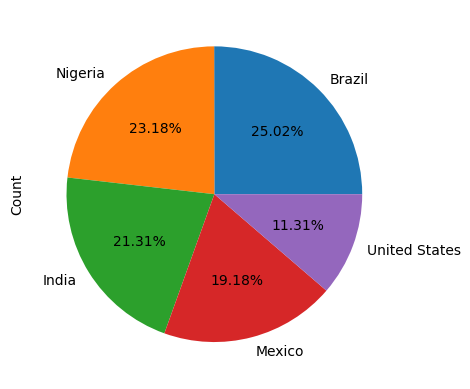

In [15]:

df1.plot(x = "Location" , y= "Count", kind="pie", labels = df1.Location, autopct = "%1.2f%%")
plt.legend().set_visible(False)

In [16]:
df2 = df.groupby("Region")["Count"].sum().sort_values(ascending=False)

In [17]:
df2

Region
N/S America    153597
Asia           105552
Africa          99481
Europe          19869
Oceania           347
Name: Count, dtype: int64

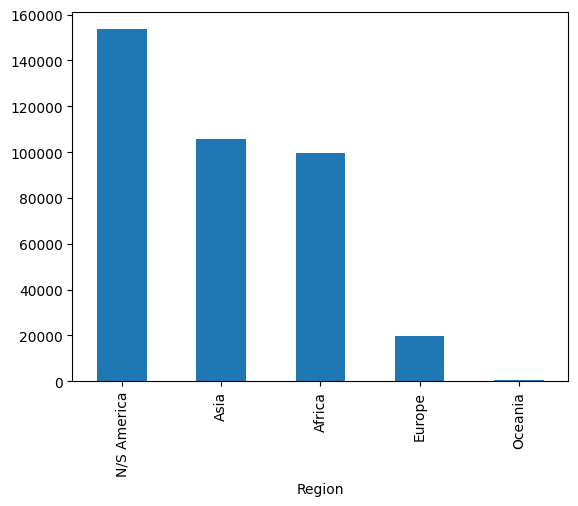

In [18]:
df2.plot(kind="bar")
plt.show()

In [19]:
df3 = df.groupby("Subregion")["Count"].sum().sort_values(ascending=False)

In [20]:
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

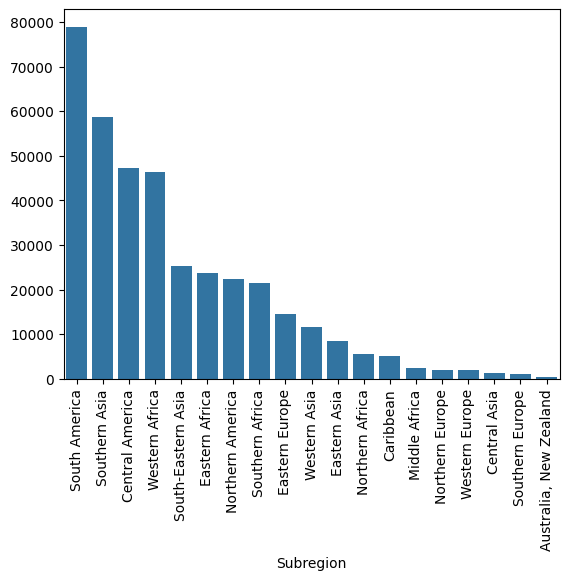

In [21]:
sns.barplot(x = df3.index, y= df3.values)
plt.xticks(rotation = 90)
xlabes = None

In [22]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [23]:
df[df["Region"].isin(["Asia", "Europe"])]

,Location,Region,Subregion,Rate,Count,Year,rate
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,6
1,Albania,Europe,Southern Europe,2.1,61,2020,2
3,Andorra,Europe,Southern Europe,2.6,2,2020,2
8,Armenia,Asia,Western Asia,1.8,52,2020,1
11,Austria,Europe,Western Europe,0.7,65,2020,0
...,...,...,...,...,...,...,...
183,United Arab Emirates,Asia,Western Asia,0.7,64,2019,0
184,United Kingdom,Europe,Northern Europe,1.1,755,2018,1
189,Uzbekistan,Asia,Central Asia,1.2,396,2019,1
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011,1


In [24]:
df4 = df[(df["Region"] == "Asia" ) | (df["Region"] == "Europe")]

In [25]:
df4 = df4[df4["Year"] > 2016] [["Region", "Year", "Count"]]

In [26]:
df4

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
3,Europe,2020,2
8,Asia,2020,52
11,Europe,2020,65
...,...,...,...
178,Asia,2020,2095
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [27]:
df4 = df4.groupby(["Region", "Year"])["Count"].sum()


In [28]:
df_unstacked = df4.unstack(level = 0)

In [29]:
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [30]:
df_unstacked.index = df_unstacked.index.astype(str)

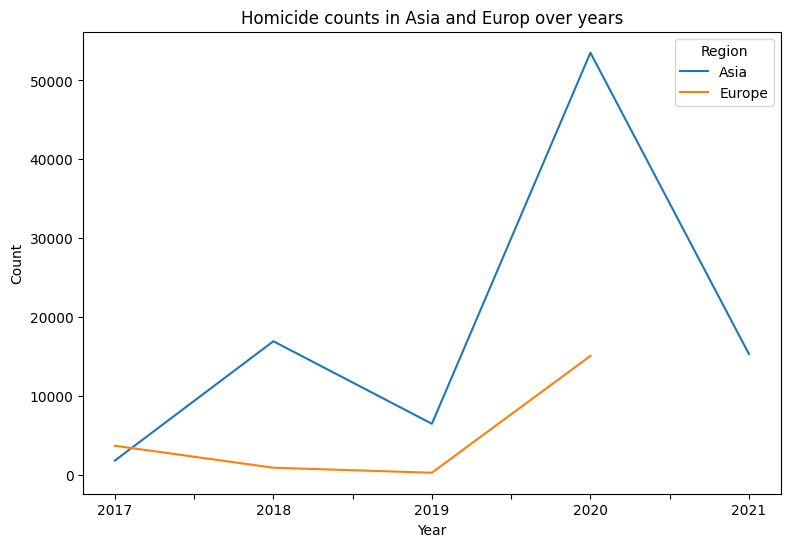

In [31]:
df_unstacked.plot(kind='line', figsize = (9,6))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Homicide counts in Asia and Europ over years")
plt.show()

In [32]:
df

,Location,Region,Subregion,Rate,Count,Year,rate
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,6
1,Albania,Europe,Southern Europe,2.1,61,2020,2
2,Algeria,Africa,Northern Africa,1.3,580,2020,1
3,Andorra,Europe,Southern Europe,2.6,2,2020,2
4,Angola,Africa,Middle Africa,4.8,1217,2012,4
...,...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36.7,10598,2018,36
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011,1
192,Yemen,Asia,Western Asia,6.8,1703,2013,6
193,Zambia,Africa,Eastern Africa,5.4,853,2015,5


In [33]:
df5 = df.groupby("Year")["rate"].sum().sort_values(ascending= False)

In [34]:
df5

Year
2020    564
2019    153
2012    113
2016     76
2018     64
2015     55
2014     52
2009     36
2021     28
2017     27
2013     20
2007     19
2010     18
2006     12
2011      8
2008      5
Name: rate, dtype: int32

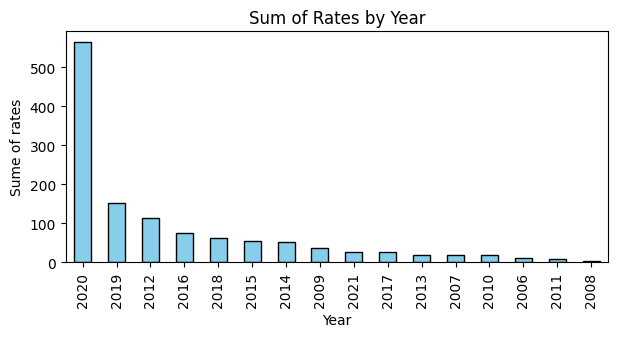

In [35]:
df5.plot(kind= 'bar', figsize=(7,3), color = "skyblue" ,edgecolor= "black" )
plt.xlabel("Year")
plt.ylabel("Sume of rates")
plt.title("Sum of Rates by Year")
plt.show()

In [36]:
df6 = df[["Region", "Year", "Count"]]

In [37]:
df6.sort_values(by = "Year")

,Region,Year,Count
27,N/S America,2006,2
179,Asia,2006,203
45,N/S America,2007,26
167,Africa,2008,1702
110,Africa,2009,12
...,...,...,...
111,N/S America,2020,36579
50,N/S America,2020,961
121,Europe,2020,107
97,Asia,2020,128


In [38]:
df6 = df6.groupby(['Year', 'Region'])["Count"].sum()
# df6.index
df6.values

array([   203,      2,     26,   1702,     27,     42,    303,      1,
          855,   1626,      0,  15264,     61,     53,   5782,   3029,
           13,   2206,    241,      0,   4987,    627,      0,    608,
         1467,   1787,   3670,  16923,    883,  13793,  44210,   6458,
          249,   4276,    126,  28460,  53516,  15066, 134784,    221,
        15299], dtype=int64)

In [39]:
df6.sort_index(level="Year", ascending= False)

Year  Region     
2021  Asia            15299
2020  Oceania           221
      N/S America    134784
      Europe          15066
      Asia            53516
      Africa          28460
2019  Oceania           126
      N/S America      4276
      Europe            249
      Asia             6458
      Africa          44210
2018  N/S America     13793
      Europe            883
      Asia            16923
2017  Europe           3670
      Asia             1787
      Africa           1467
2016  N/S America       608
      Europe              0
      Asia              627
      Africa           4987
2015  Europe              0
      Asia              241
      Africa           2206
2014  N/S America        13
      Asia             3029
2013  Asia             5782
2012  N/S America        53
      Asia               61
      Africa          15264
2011  Europe              0
      Asia             1626
      Africa            855
2010  Europe              1
      Africa            303
20

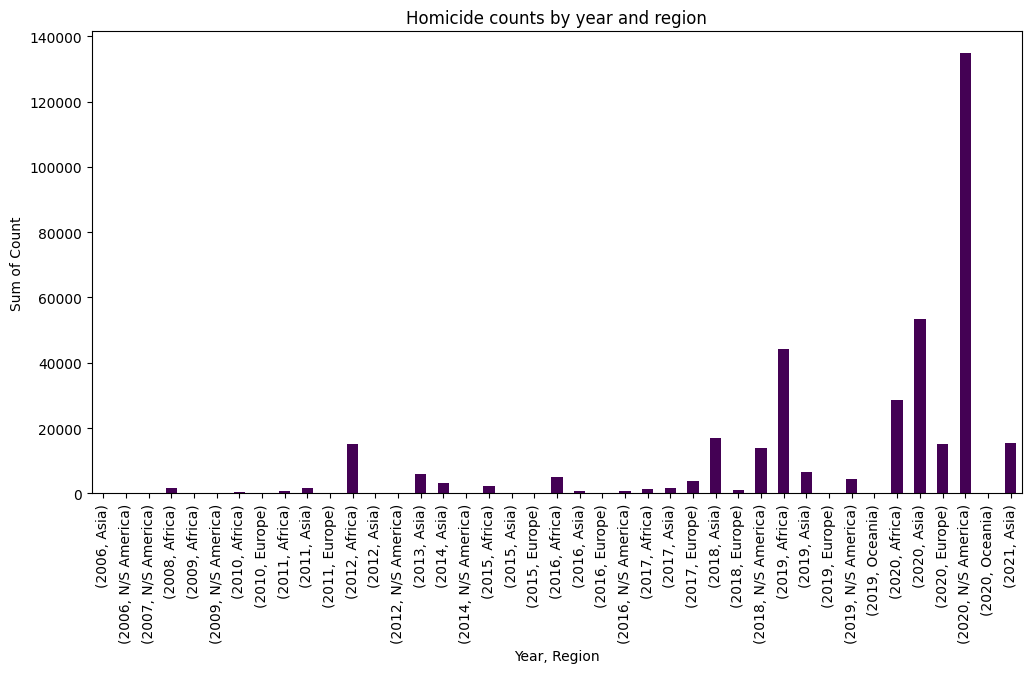

In [40]:
df6.plot(kind='bar', figsize=(12,6), colormap = "viridis")
plt.xlabel("Year, Region")
plt.ylabel("Sum of Count")
plt.title("Homicide counts by year and region")
plt.show()

In [41]:
df

,Location,Region,Subregion,Rate,Count,Year,rate
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018,6
1,Albania,Europe,Southern Europe,2.1,61,2020,2
2,Algeria,Africa,Northern Africa,1.3,580,2020,1
3,Andorra,Europe,Southern Europe,2.6,2,2020,2
4,Angola,Africa,Middle Africa,4.8,1217,2012,4
...,...,...,...,...,...,...,...
190,Venezuela,N/S America,South America,36.7,10598,2018,36
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011,1
192,Yemen,Asia,Western Asia,6.8,1703,2013,6
193,Zambia,Africa,Eastern Africa,5.4,853,2015,5


In [42]:
df7 = df.groupby("Subregion")["Count"].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [43]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [44]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [45]:
data = {

    'Category': df7.index,
    'Value' : df7.values,
    'info': df7.values
}
df8 = pd.DataFrame(data)
df8

,Category,Value,info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [49]:
fig = px.treemap(df8, path= ['Category'], values= 'Value', title= 'Treemap')
fig.update_traces(hovertemplate = 'Category: %{label}<br>Value:%{value}')
fig.show()